In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [72]:
train = pd.read_csv("/kaggle/input/mock-test-2-mse-2/train.csv")
test=pd.read_csv("/kaggle/input/mock-test-2-mse-2/test.csv")

print(train.shape)
train.head()


(15000, 20)


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1481.0,Placebo,12963.0,F,N,Y,N,N,2.4,346.0,3.34,70.0,1212.0,122.45,118.0,117.0,12.2,4.0,C
1,1,2580.0,D-penicillamine,20819.0,F,N,N,N,N,0.6,NaN,4.52,51.0,645.0,74.40,NaN,181.0,10.4,3.0,C
2,2,837.0,D-penicillamine,12307.0,F,N,Y,Y,N,6.1,586.0,2.73,89.0,2045.0,196.85,90.0,228.0,10.4,3.0,D
3,3,3021.0,NaN,17532.0,F,NaN,NaN,NaN,N,0.6,NaN,3.34,NaN,NaN,NaN,NaN,388.0,10.4,3.0,C
4,4,1980.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.8,NaN,3.65,NaN,NaN,NaN,NaN,190.0,11.1,4.0,C


In [73]:
train.shape

(15000, 20)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8459 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8460 non-null   object 
 6   Hepatomegaly   8457 non-null   object 
 7   Spiders        8448 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6625 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8343 non-null   float64
 13  Alk_Phos       8453 non-null   float64
 14  SGOT           8449 non-null   float64
 15  Tryglicerides  6578 non-null   float64
 16  Platelets      14418 non-null  float64
 17  Prothrombin    14981 non-null  float64
 18  Stage 

In [75]:
train.isnull().sum()

id                  0
N_Days              0
Drug             6541
Age                 0
Sex                 0
Ascites          6540
Hepatomegaly     6543
Spiders          6552
Edema               0
Bilirubin           0
Cholesterol      8375
Albumin             0
Copper           6657
Alk_Phos         6547
SGOT             6551
Tryglicerides    8422
Platelets         582
Prothrombin        19
Stage               0
Status              0
dtype: int64

In [76]:
test_id=test['id']
test=test.drop(columns=['id'])

In [77]:
train=train.drop(columns=['id'])
X=train.drop(columns=['Status'])
y=train['Status']

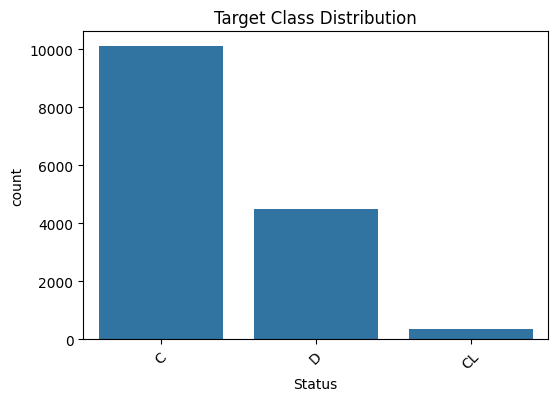

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.xticks(rotation=45)
plt.show()


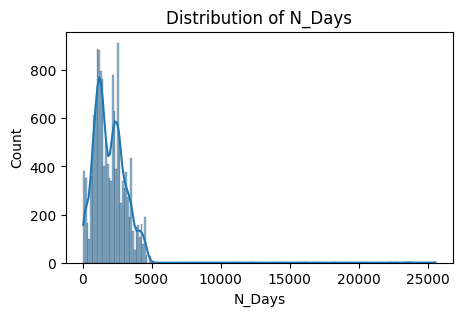

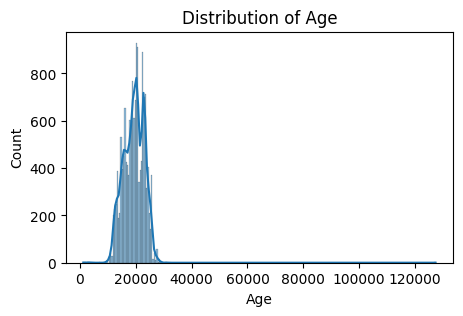

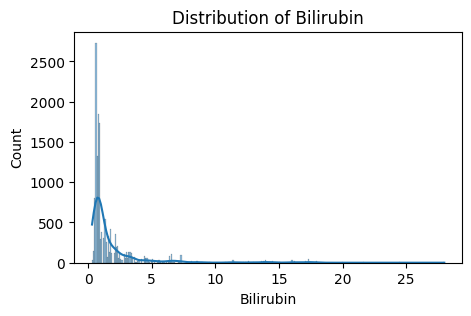

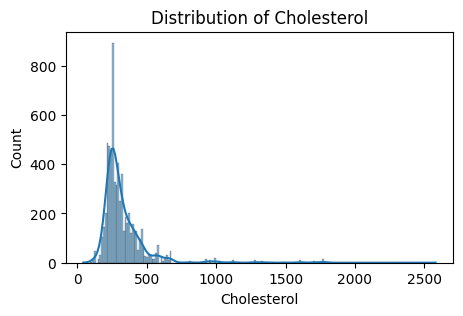

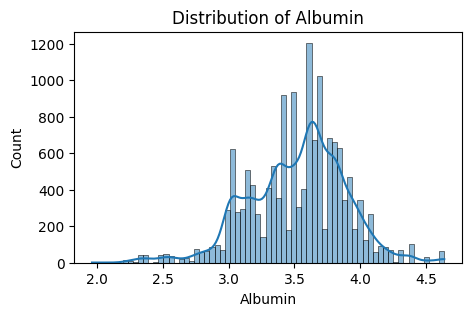

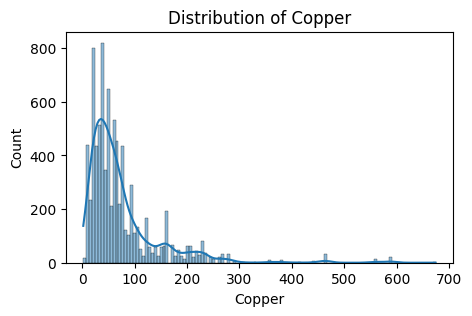

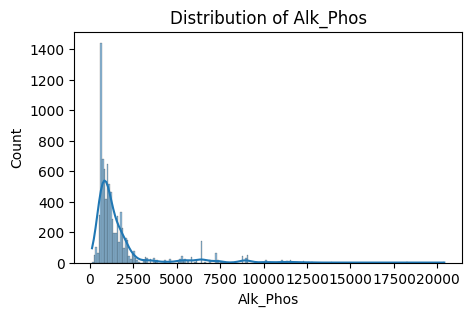

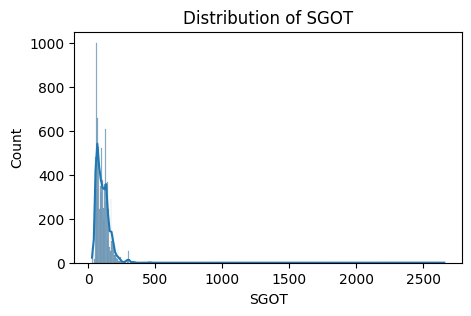

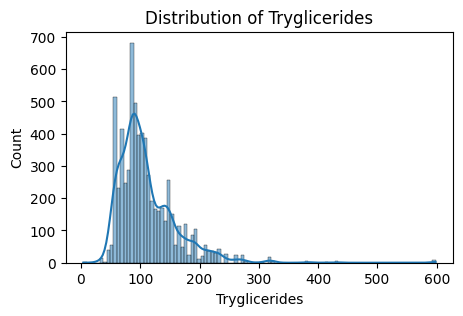

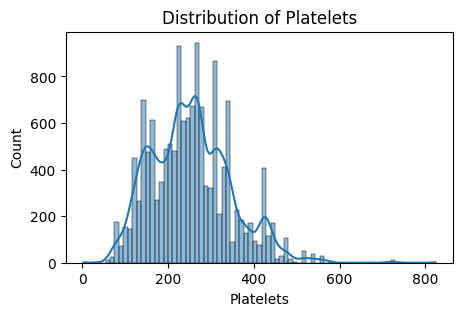

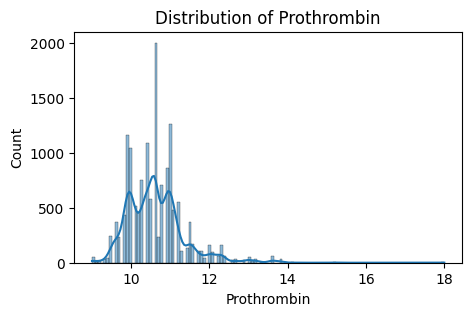

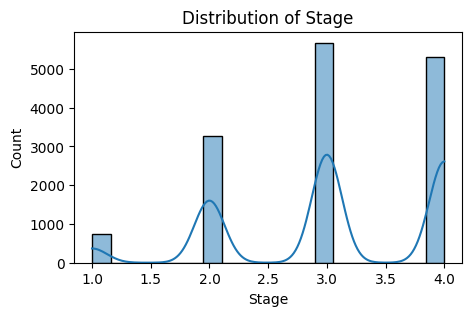

In [79]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



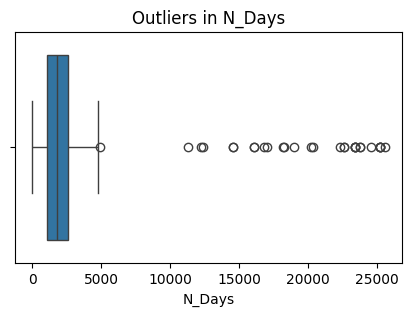

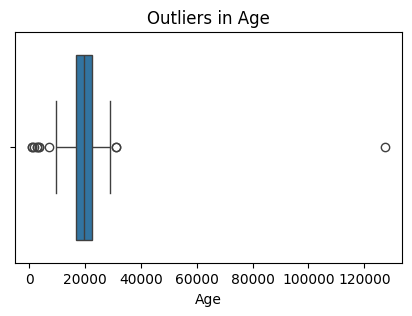

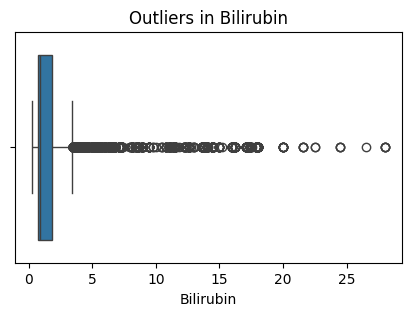

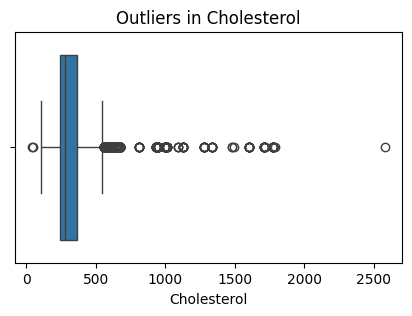

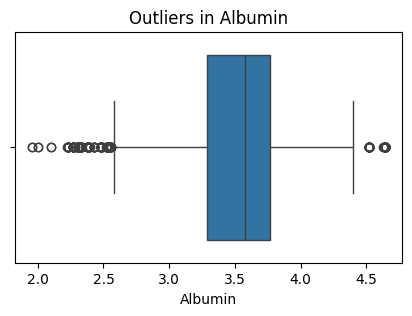

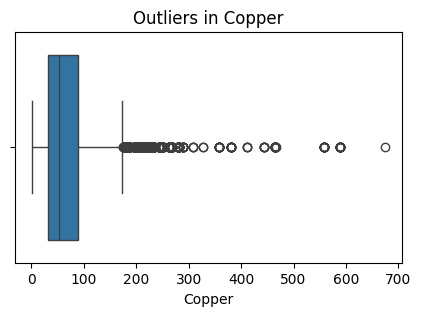

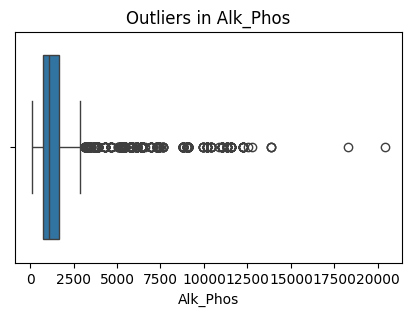

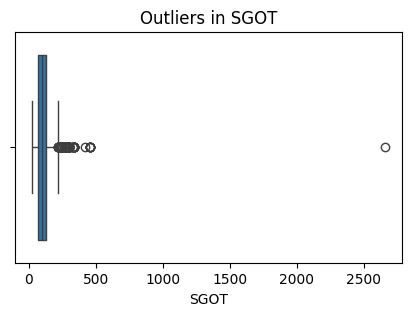

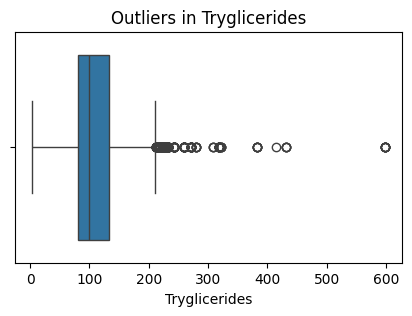

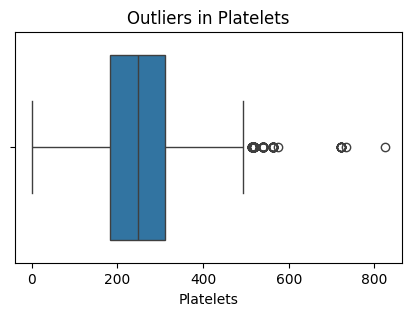

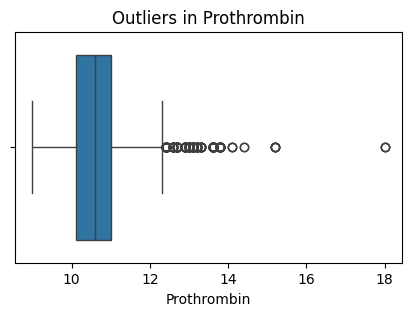

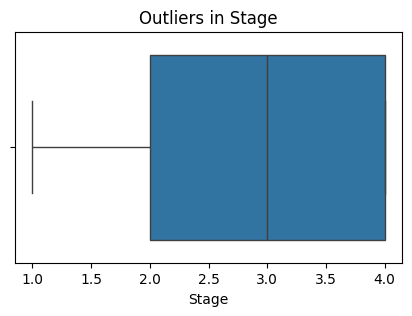

In [81]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=train[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [82]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


In [83]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [84]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [85]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


In [86]:
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [88]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [89]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8483333333333334
              precision    recall  f1-score   support

           C       0.86      0.94      0.90      2023
          CL       0.29      0.03      0.05        74
           D       0.81      0.72      0.76       903

    accuracy                           0.85      3000
   macro avg       0.65      0.56      0.57      3000
weighted avg       0.83      0.85      0.84      3000



In [90]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("Best Accuracy:", grid.best_score_)


Best Accuracy: 0.8479166666666665


In [92]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
Accuracy: 0.8453333333333334
              precision    recall  f1-score   support

           C       0.86      0.94      0.90      2023
          CL       0.50      0.04      0.07        74
           D       0.81      0.71      0.75       903

    accuracy                           0.85      3000
   macro avg       0.72      0.56      0.58      3000
weighted avg       0.84      0.85      0.83      3000



In [ ]:
# pipeline.predict_proba(X_test)  # ✅


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # fit on train
y_test_enc = le.transform(y_test)  

In [95]:
y_proba = pipeline.predict_proba(X_test)

In [97]:
from sklearn.metrics import log_loss
loss = log_loss(y_test_enc, y_proba)
print("Log Loss:", loss)


Log Loss: 0.48222455532036346


In [98]:
y_final=pipeline.predict_proba(test)

In [ ]:
# submission = pd.DataFrame(
#     proba,
#     columns=["Status_C", "Status_CL", "Status_D"]
# )

# submission.insert(0, "id", test_id)

# # -------------------------------
# # Save submission file
# # -------------------------------
# submission.to_csv("submission.csv", index=False)

# print("✅ submission.csv file created successfully")

In [99]:
class_names = le.classes_  # use label encoder mapping
submission = pd.DataFrame(y_final, columns=[f"Status_{cls}" for cls in class_names])
submission.insert(0, 'id', test_id)
submission.to_csv("submission4.csv", index=False)
print("\n✅ Submission file created successfully!")
print(submission.head())



✅ Submission file created successfully!
      id  Status_C  Status_CL  Status_D
0  15000      0.98       0.00      0.02
1  15001      0.85       0.00      0.15
2  15002      0.93       0.00      0.07
3  15003      0.35       0.05      0.60
4  15004      0.96       0.00      0.04
